<a href="https://colab.research.google.com/github/anilsah895/skin_diseases_detection/blob/master/latest_sample_skinmodel_(10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
Base_dir="gdrive/My Drive/Colab Notebooks/skin data/"
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"

In [0]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from keras import optimizers



Using TensorFlow backend.


In [0]:
Base_dir="C:/Users/Acer/Desktop/skin data/"
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(96,96,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
__________

In [0]:
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)


In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
# Change the batchsize according to your system RAM
train_batchsize = 15
val_batchsize = 10
target_size=(96,96)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=target_size,
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

 
checkpoint_path = Base_dir+"weight{epoch:04d}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpointer = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_weights_only=True,save_best_only=False,
                                                  period=5)
                                              
  # Compile the model
''''model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])'''''
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

history =model.fit_generator(
      train_generator,callbacks = [checkpointer],
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=500,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1
    )




Found 5914 images belonging to 8 classes.
Found 1461 images belonging to 8 classes.
Epoch 1/500
395/394 [==============================] - 43s 109ms/step - loss: 1.9177 - acc: 0.2419 - val_loss: 1.9335 - val_acc: 0.2498
Epoch 2/500
395/394 [==============================] - 44s 112ms/step - loss: 1.9148 - acc: 0.2524 - val_loss: 1.9225 - val_acc: 0.2669
Epoch 3/500
395/394 [==============================] - 49s 124ms/step - loss: 1.9075 - acc: 0.2631 - val_loss: 1.9218 - val_acc: 0.2423
Epoch 4/500
395/394 [==============================] - 46s 116ms/step - loss: 1.8979 - acc: 0.2749 - val_loss: 1.8926 - val_acc: 0.2950
Epoch 5/500
395/394 [==============================] - 49s 125ms/step - loss: 1.8899 - acc: 0.2741 - val_loss: 1.8759 - val_acc: 0.2841

Epoch 00005: saving model to C:/Users/Acer/Desktop/skin data/weight0005.hdf5
Epoch 6/500
395/394 [==============================] - 51s 128ms/step - loss: 1.8766 - acc: 0.2801 - val_loss: 1.8831 - val_acc: 0.2875
Epoch 7/500
395/394 [=

395/394 [==============================] - 51s 130ms/step - loss: 1.7232 - acc: 0.3626 - val_loss: 1.7307 - val_acc: 0.3730
Epoch 55/500
395/394 [==============================] - 50s 127ms/step - loss: 1.7262 - acc: 0.3652 - val_loss: 1.7189 - val_acc: 0.3648

Epoch 00055: saving model to C:/Users/Acer/Desktop/skin data/weight0055.hdf5
Epoch 56/500
395/394 [==============================] - 48s 122ms/step - loss: 1.7192 - acc: 0.3655 - val_loss: 1.7100 - val_acc: 0.3737
Epoch 57/500
395/394 [==============================] - 49s 125ms/step - loss: 1.7143 - acc: 0.3635 - val_loss: 1.7137 - val_acc: 0.3758
Epoch 58/500
395/394 [==============================] - 49s 124ms/step - loss: 1.7091 - acc: 0.3683 - val_loss: 1.7505 - val_acc: 0.3546
Epoch 59/500
395/394 [==============================] - 50s 127ms/step - loss: 1.7132 - acc: 0.3652 - val_loss: 1.7471 - val_acc: 0.3621
Epoch 60/500
395/394 [==============================] - 49s 124ms/step - loss: 1.7137 - acc: 0.3686 - val_loss: 1

395/394 [==============================] - 49s 123ms/step - loss: 1.5608 - acc: 0.4315 - val_loss: 1.5917 - val_acc: 0.4079
Epoch 108/500
395/394 [==============================] - 49s 124ms/step - loss: 1.5693 - acc: 0.4219 - val_loss: 1.5490 - val_acc: 0.4230
Epoch 109/500
395/394 [==============================] - 49s 123ms/step - loss: 1.5617 - acc: 0.4266 - val_loss: 1.5802 - val_acc: 0.4182
Epoch 110/500
395/394 [==============================] - 49s 125ms/step - loss: 1.5619 - acc: 0.4257 - val_loss: 1.5256 - val_acc: 0.4415

Epoch 00110: saving model to C:/Users/Acer/Desktop/skin data/weight0110.hdf5
Epoch 111/500
395/394 [==============================] - 50s 126ms/step - loss: 1.5546 - acc: 0.4276 - val_loss: 1.5778 - val_acc: 0.4312
Epoch 112/500
395/394 [==============================] - 52s 132ms/step - loss: 1.5538 - acc: 0.4299 - val_loss: 1.5333 - val_acc: 0.4237
Epoch 113/500
395/394 [==============================] - 58s 147ms/step - loss: 1.5499 - acc: 0.4319 - val_l


Epoch 00160: saving model to C:/Users/Acer/Desktop/skin data/weight0160.hdf5
Epoch 161/500
395/394 [==============================] - 50s 126ms/step - loss: 1.3911 - acc: 0.4895 - val_loss: 1.4304 - val_acc: 0.4839
Epoch 162/500
395/394 [==============================] - 51s 128ms/step - loss: 1.3911 - acc: 0.4899 - val_loss: 1.4343 - val_acc: 0.4901
Epoch 163/500
395/394 [==============================] - 51s 128ms/step - loss: 1.3837 - acc: 0.4956 - val_loss: 1.4283 - val_acc: 0.4757
Epoch 164/500
395/394 [==============================] - 49s 124ms/step - loss: 1.3839 - acc: 0.4955 - val_loss: 1.4913 - val_acc: 0.4709
Epoch 165/500
395/394 [==============================] - 49s 125ms/step - loss: 1.3713 - acc: 0.4961 - val_loss: 1.3989 - val_acc: 0.5031

Epoch 00165: saving model to C:/Users/Acer/Desktop/skin data/weight0165.hdf5
Epoch 166/500
395/394 [==============================] - 49s 125ms/step - loss: 1.3705 - acc: 0.4989 - val_loss: 1.4118 - val_acc: 0.4846
Epoch 167/500
39

395/394 [==============================] - 50s 126ms/step - loss: 1.2134 - acc: 0.5506 - val_loss: 1.3320 - val_acc: 0.5277
Epoch 215/500
395/394 [==============================] - 50s 126ms/step - loss: 1.2061 - acc: 0.5605 - val_loss: 1.3281 - val_acc: 0.5277

Epoch 00215: saving model to C:/Users/Acer/Desktop/skin data/weight0215.hdf5
Epoch 216/500
395/394 [==============================] - 49s 125ms/step - loss: 1.2091 - acc: 0.5600 - val_loss: 1.3422 - val_acc: 0.5270
Epoch 217/500
395/394 [==============================] - 49s 125ms/step - loss: 1.2003 - acc: 0.5675 - val_loss: 1.3084 - val_acc: 0.5407
Epoch 218/500
395/394 [==============================] - 50s 126ms/step - loss: 1.2097 - acc: 0.5662 - val_loss: 1.3358 - val_acc: 0.5366
Epoch 219/500
395/394 [==============================] - 49s 125ms/step - loss: 1.2009 - acc: 0.5603 - val_loss: 1.3332 - val_acc: 0.5229
Epoch 220/500
395/394 [==============================] - 49s 125ms/step - loss: 1.2012 - acc: 0.5587 - val_l

395/394 [==============================] - 50s 126ms/step - loss: 1.0649 - acc: 0.6171 - val_loss: 1.2707 - val_acc: 0.5729
Epoch 268/500
395/394 [==============================] - 50s 127ms/step - loss: 1.0864 - acc: 0.6049 - val_loss: 1.3273 - val_acc: 0.5537
Epoch 269/500
395/394 [==============================] - 50s 126ms/step - loss: 1.0602 - acc: 0.6194 - val_loss: 1.3242 - val_acc: 0.5517
Epoch 270/500
395/394 [==============================] - 51s 128ms/step - loss: 1.0738 - acc: 0.6146 - val_loss: 1.2832 - val_acc: 0.5619

Epoch 00270: saving model to C:/Users/Acer/Desktop/skin data/weight0270.hdf5
Epoch 271/500
395/394 [==============================] - 52s 130ms/step - loss: 1.0530 - acc: 0.6217 - val_loss: 1.2606 - val_acc: 0.5626
Epoch 272/500
395/394 [==============================] - 50s 128ms/step - loss: 1.0596 - acc: 0.6249 - val_loss: 1.3120 - val_acc: 0.5702
Epoch 273/500
395/394 [==============================] - 51s 129ms/step - loss: 1.0526 - acc: 0.6238 - val_l


Epoch 00320: saving model to C:/Users/Acer/Desktop/skin data/weight0320.hdf5
Epoch 321/500
395/394 [==============================] - 49s 125ms/step - loss: 0.9320 - acc: 0.6717 - val_loss: 1.2624 - val_acc: 0.5859
Epoch 322/500
395/394 [==============================] - 50s 126ms/step - loss: 0.9350 - acc: 0.6614 - val_loss: 1.2719 - val_acc: 0.5749
Epoch 323/500
395/394 [==============================] - 49s 125ms/step - loss: 0.9268 - acc: 0.6657 - val_loss: 1.2313 - val_acc: 0.5948
Epoch 324/500
395/394 [==============================] - 49s 125ms/step - loss: 0.9260 - acc: 0.6723 - val_loss: 1.2289 - val_acc: 0.5975
Epoch 325/500
395/394 [==============================] - 50s 127ms/step - loss: 0.9210 - acc: 0.6746 - val_loss: 1.3006 - val_acc: 0.5667

Epoch 00325: saving model to C:/Users/Acer/Desktop/skin data/weight0325.hdf5
Epoch 326/500
395/394 [==============================] - 50s 127ms/step - loss: 0.9299 - acc: 0.6641 - val_loss: 1.3062 - val_acc: 0.5722
Epoch 327/500
39

395/394 [==============================] - 49s 125ms/step - loss: 0.8226 - acc: 0.7093 - val_loss: 1.3115 - val_acc: 0.5886
Epoch 375/500
395/394 [==============================] - 49s 125ms/step - loss: 0.7998 - acc: 0.7128 - val_loss: 1.2885 - val_acc: 0.6023

Epoch 00375: saving model to C:/Users/Acer/Desktop/skin data/weight0375.hdf5
Epoch 376/500
395/394 [==============================] - 50s 125ms/step - loss: 0.8006 - acc: 0.7167 - val_loss: 1.2874 - val_acc: 0.5969
Epoch 377/500
395/394 [==============================] - 50s 126ms/step - loss: 0.8375 - acc: 0.7057 - val_loss: 1.2345 - val_acc: 0.6105
Epoch 378/500
395/394 [==============================] - 49s 125ms/step - loss: 0.8333 - acc: 0.7055 - val_loss: 1.2566 - val_acc: 0.6044
Epoch 379/500
395/394 [==============================] - 49s 125ms/step - loss: 0.8261 - acc: 0.7046 - val_loss: 1.3427 - val_acc: 0.5838
Epoch 380/500
395/394 [==============================] - 50s 126ms/step - loss: 0.8050 - acc: 0.7149 - val_l

395/394 [==============================] - 49s 124ms/step - loss: 0.7209 - acc: 0.7451 - val_loss: 1.2564 - val_acc: 0.6146
Epoch 428/500
395/394 [==============================] - 49s 124ms/step - loss: 0.7171 - acc: 0.7526 - val_loss: 1.2816 - val_acc: 0.6092
Epoch 429/500
395/394 [==============================] - 49s 125ms/step - loss: 0.7236 - acc: 0.7445 - val_loss: 1.2793 - val_acc: 0.6092
Epoch 430/500
395/394 [==============================] - 49s 125ms/step - loss: 0.7435 - acc: 0.7367 - val_loss: 1.2853 - val_acc: 0.6016

Epoch 00430: saving model to C:/Users/Acer/Desktop/skin data/weight0430.hdf5
Epoch 431/500
395/394 [==============================] - 49s 125ms/step - loss: 0.7371 - acc: 0.7418 - val_loss: 1.2848 - val_acc: 0.6167
Epoch 432/500
395/394 [==============================] - 50s 128ms/step - loss: 0.7173 - acc: 0.7506 - val_loss: 1.2615 - val_acc: 0.6051
Epoch 433/500
395/394 [==============================] - 50s 126ms/step - loss: 0.7287 - acc: 0.7390 - val_l


Epoch 00480: saving model to C:/Users/Acer/Desktop/skin data/weight0480.hdf5
Epoch 481/500
395/394 [==============================] - 49s 124ms/step - loss: 0.6488 - acc: 0.7736 - val_loss: 1.3290 - val_acc: 0.6105
Epoch 482/500
395/394 [==============================] - 49s 124ms/step - loss: 0.6393 - acc: 0.7794 - val_loss: 1.2901 - val_acc: 0.6126
Epoch 483/500
395/394 [==============================] - 49s 124ms/step - loss: 0.6311 - acc: 0.7772 - val_loss: 1.2326 - val_acc: 0.6263
Epoch 484/500
395/394 [==============================] - 49s 125ms/step - loss: 0.6553 - acc: 0.7771 - val_loss: 1.2246 - val_acc: 0.6324
Epoch 485/500
395/394 [==============================] - 49s 125ms/step - loss: 0.6317 - acc: 0.7793 - val_loss: 1.3213 - val_acc: 0.6057

Epoch 00485: saving model to C:/Users/Acer/Desktop/skin data/weight0485.hdf5
Epoch 486/500
395/394 [==============================] - 50s 126ms/step - loss: 0.6439 - acc: 0.7737 - val_loss: 1.3391 - val_acc: 0.6023
Epoch 487/500
39

In [0]:
# Save the model
#model.save(Base_dir+'weight_500.hdf5')

In [0]:
pip freeze

absl-py==0.6.1
AdvancedHTTPServer==2.1.0
astor==0.7.1
attrs==19.1.0
backcall==0.1.0
bleach==3.1.0
colorama==0.4.1
decorator==4.4.0
defusedxml==0.6.0
entrypoints==0.3
enum34==1.1.6
gast==0.2.0
grpcio==1.16.1
h5py==2.8.0
ipykernel==5.1.1
ipython==7.5.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jedi==0.13.3
Jinja2==2.10.1
jsonschema==3.0.1
jupyter==1.0.0
jupyter-client==5.2.4
jupyter-console==6.0.0
jupyter-core==4.4.0
jupyter-http-over-ws==0.0.6
Keras==2.2.4
Keras-Applications==1.0.6
Keras-Preprocessing==1.0.5
Markdown==3.0.1
MarkupSafe==1.1.1
mistune==0.8.4
nbconvert==5.5.0
nbformat==4.4.0
notebook==5.7.8
numpy==1.15.4
pandocfilters==1.4.2
parso==0.4.0
pickleshare==0.7.5
Pillow==5.3.0
prometheus-client==0.6.0
prompt-toolkit==2.0.9
protobuf==3.6.1
Pygments==2.4.0
pyrsistent==0.15.2
python-dateutil==2.8.0
pywinpty==0.5.5
PyYAML==3.13
pyzmq==18.0.1
qtconsole==4.4.4
scikit-learn==0.20.1
scipy==1.1.0
Send2Trash==1.5.0
six==1.11.0
sklearn==0.0
tensorboard==1.9.0
tensorflow-gpu==1.9.0
termcolor

In [0]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [0]:
import matplotlib.pyplot as plt

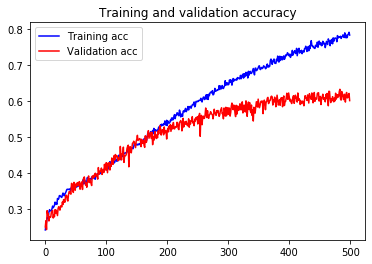

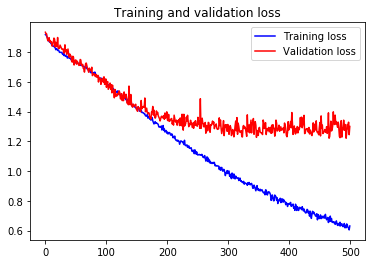

In [0]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

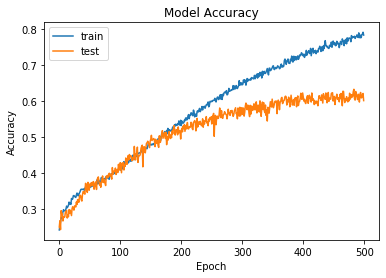

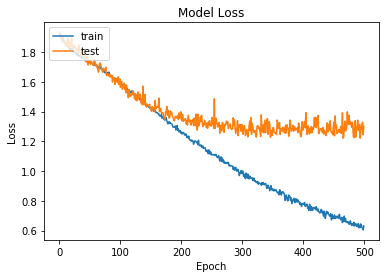

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
